In [1]:

import sys
import os

os.chdir("../")

os.getcwd()

'/Users/bahlow/Desktop/Spring_2025/ChE_class/Homeworks/Homework'

         0         1         2         3          4          5         6   \
0  0.841499  1.009367  0.993816  8.469805  10.278727  10.037759  8.501365   
1  0.842250  1.006584  0.996605  7.531891   9.139924   8.951618  7.612213   
2  0.840723  1.011647  0.998152  6.641699   7.975464   7.857692  6.593117   
3  0.841119  1.017807  0.996812  5.687524   6.824334   6.689885  5.615428   
4  0.840358  1.016534  0.996221  5.660385   6.829560   6.675628  5.623977   

         7          8          9   ...         27         28         29  \
0  8.581726  10.247763  10.058822  ...  32.451173  34.568685  33.082683   
1  7.623325   9.106345   8.945142  ...  32.428385  34.441732  33.081055   
2  6.681572   7.964596   7.814698  ...  32.428385  34.275715  33.113605   
3  5.763315   6.801051   6.686639  ...  32.485350  34.080403  33.170573   
4  5.736818   6.813453   6.672377  ...  32.503255  34.122720  33.164062   

          30         31         32         33         34         35  36  
0  36.722005

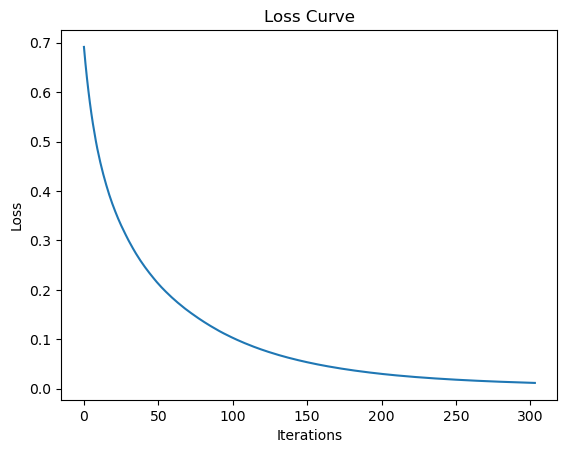


Training ANN with: {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'max_iter': 500}
Model Training Complete
Model Accuracy: 0.9286
Classification Report:
              precision    recall  f1-score   support

         1.0       0.86      1.00      0.92         6
         2.0       1.00      0.88      0.93         8

    accuracy                           0.93        14
   macro avg       0.93      0.94      0.93        14
weighted avg       0.94      0.93      0.93        14



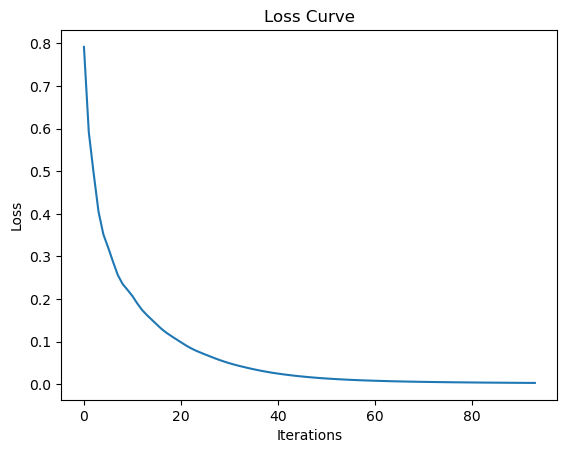


Training ANN with: {'hidden_layer_sizes': (150, 100), 'learning_rate_init': 0.005, 'max_iter': 700}
Model Training Complete
Model Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         6
         2.0       1.00      1.00      1.00         8

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



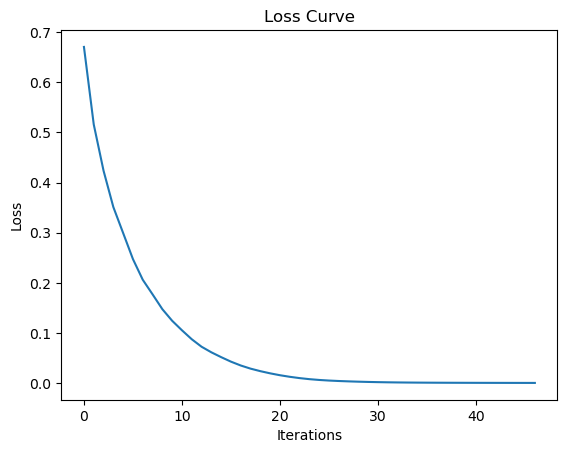


Training ANN with: {'hidden_layer_sizes': (200, 150, 100), 'learning_rate_init': 0.001, 'max_iter': 2000}
Model Training Complete
Model Accuracy: 0.9286
Classification Report:
              precision    recall  f1-score   support

         1.0       0.86      1.00      0.92         6
         2.0       1.00      0.88      0.93         8

    accuracy                           0.93        14
   macro avg       0.93      0.94      0.93        14
weighted avg       0.94      0.93      0.93        14



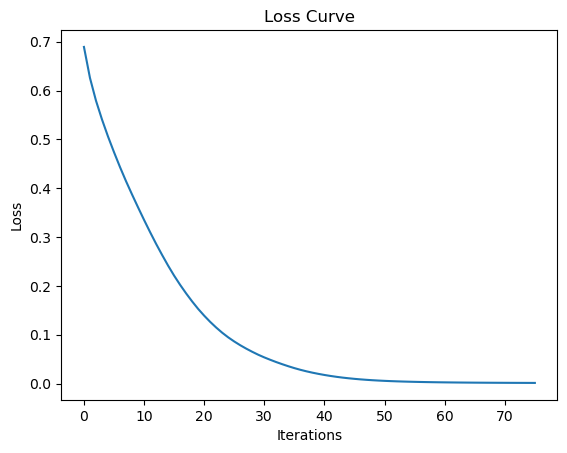


Hyperparameter Tuning Results:
Hidden Layers: (50,), Learning Rate: 0.002, Max Iter: 800, Accuracy: 100.0000
Hidden Layers: (100,), Learning Rate: 0.01, Max Iter: 500, Accuracy: 92.8571
Hidden Layers: (150, 100), Learning Rate: 0.005, Max Iter: 700, Accuracy: 100.0000
Hidden Layers: (200, 150, 100), Learning Rate: 0.001, Max Iter: 2000, Accuracy: 92.8571


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from src.data_preprocess import DataPreprocessing
from src.model_builder import ModelBuilder
from src.ANN import ANN  # Import ANN directly for hyperparameter tuning

# Initialize data preprocessor
preprocessor = DataPreprocessing()

# Load dataset using the correct method
data = preprocessor.load_data("data/Meter_A.txt")

train_validation, test = train_test_split(data, test_size = 0.2, random_state=12)

train, validation = train_test_split(train_validation, test_size = 0.2, random_state=99)

# Apply feature scaling
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[:, :-1])  # Scale training features
validation_scaled = scaler.transform(validation[:, :-1])  # Scale validation features

# Define hyperparameter search space
hyperparams = [
    {"hidden_layer_sizes": (50,), "learning_rate_init": 0.002, "max_iter": 800},
    {"hidden_layer_sizes": (100,), "learning_rate_init": 0.01, "max_iter": 500},
    {"hidden_layer_sizes": (150, 100), "learning_rate_init": 0.005, "max_iter": 700},
    {"hidden_layer_sizes": (200, 150, 100), "learning_rate_init": 0.001, "max_iter": 2000}
]

# Store results
results = []

# Perform hyperparameter tuning
for params in hyperparams:
    print(f"\nTraining ANN with: {params}")
    
    # Create ANN model with specific hyperparameters
    ann = ANN(
        hidden_layer_sizes=params["hidden_layer_sizes"],
        learning_rate_init=params["learning_rate_init"],
        max_iter=params["max_iter"]
    )
    
    # Train the model
    ann.train(train_scaled, train[:, -1])

    # Evaluate the model
    accuracy = ann.evaluate(validation_scaled, validation[:, -1])

    # Save results
    results.append({
        "hidden_layer_sizes": params["hidden_layer_sizes"],
        "learning_rate_init": params["learning_rate_init"],
        "max_iter": params["max_iter"],
        "accuracy": accuracy
    })

    # Plot loss curve
    ann.plot_loss_curve()

# Print all results
print("\nHyperparameter Tuning Results:")
for res in results:
    print(f"Hidden Layers: {res['hidden_layer_sizes']}, Learning Rate: {res['learning_rate_init']}, "
          f"Max Iter: {res['max_iter']}, Accuracy: {res['accuracy']*100:.4f}")

    